<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

# 훈련 결과 표시
def plot_for_loss_accuracy(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('loss, accuracy')
  plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
  plt.show()

# 훈련 결과 차이 표시
def plot_of_accuracy_difference(history):
  loss_def = []
  accuracy_def = []
  list_idx = 0
  while list_idx < len(history.history['loss']):
    loss_def.append(abs(history.history['loss'][list_idx]-history.history['val_loss'][list_idx]))
    accuracy_def.append(abs(history.history['accuracy'][list_idx]-history.history['val_accuracy'][list_idx]))
    list_idx = list_idx + 1

  plt.plot(loss_def)
  plt.plot(accuracy_def)
  plt.xlabel('epoch')
  plt.ylabel('difference')
  plt.legend(['loss_def', 'accuracy_def'])
  plt.show()

In [ ]:
from tensorflow import keras
def commit_sequence_test(model, test_seq, test_target):
  testing_model = keras.models.load_model(model)
  testing_model.evaluate(test_seq, test_target)

In [ ]:
# LSTM, GRU cell: 순환 신경망에서 빼 놓을 수 없는 핵심 기술

# SimpleRNN보다 훨씬 복잡하지만 성능이 뛰어나서 순환신경망에 많이 채택된다
# 일반적인 기본 순환층은 긴 sequence를 학습하기 힘들다 - 길 수록 순환되는 은닉 상태에 담긴 정보가 점차 희석된다
# 멀리 떨어져 있는 단어 정보를 인식하는데 어려울 수 있다 -> LSTM, GRU를 사용하는 이유!

# LSTM(Long Short-Term Memory): 단기 기억을 오래 기억하기 위해 고안된 개념
# - 입력과 가중치를 곱하고 절편을 더해 활성 함수를 통과시키는 구조를 여러개 갖고 있다
# - 계산 결과는 다음 timestep에 재사용

# 1. 은닉상태 생성
# - 입력과 이전 timestep의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜서 다음 은닉 상태 생성
# - 이때 기본 순환층과는 다르게 sigmoid함수 사용하고 tanh 함수를 통과한 어떤 값과 곱해져서 은닉 상태로 생성

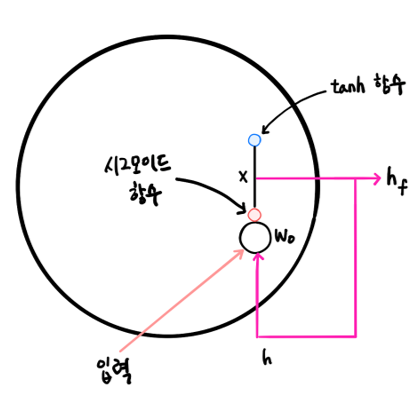

In [ ]:
# 위 그림대로 가중치 w_x와 w_h를 통틀어 w_o라고 표시
# 파란색 원은 tanh, 빨간색 원은 sigmoid, x는 곱셈 -> 기본 순환층과 크게 차이 X

# tanh를 통과하는 값? - LSTM에는 순환되는 상태가 2개 (은닉 상태, cell 상태)
# 은닉 상태와 달리 cell 상태는 다음 층으로 전달되지 않고, LSTM cell에서 순환만 되는 값이다

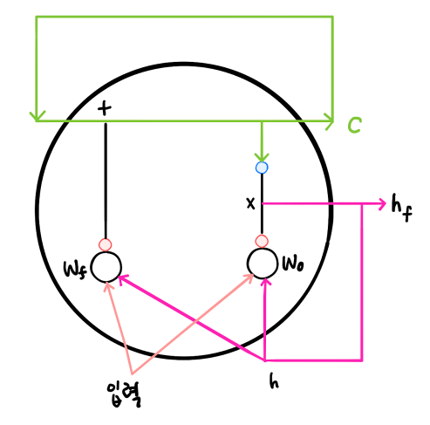

In [ ]:
# 위 그림에서 녹색은 순환되는 cell 구조 - cell 상태를 은닉 상태 h와 구분하여 c로 표시

# cell 상태를 계산하는 과정
# 1. 먼저 입력과 은닉 상태를 다시 가중치 w_f에 곱한 다음 sigmoid 함수 통과
# 2. 그 다음 이전 timestep의 cell 상태와 곱해서 새로운 cell의 상태를 만든다
# - 이 cell 상태가 오른쪽에서 tanh 함수를 통과해서 새로운 은닉 상태를 만드는데 기여한다
# 3. LSTM은 마치 작은 cell을 여러개 포함하고 있는 큰 cell
# - 여기서 중요한 것은 입력과 은닉 상태에서 곱해지는 가중치 w_o와 w_f가 다르다는 것
# - 이 두 작은 cell은 각기 다른 기능을 위해 훈련한다

# 여기에 2개의 작은 cell이 더 추가되어 cell의 상태를 만드는데 기여

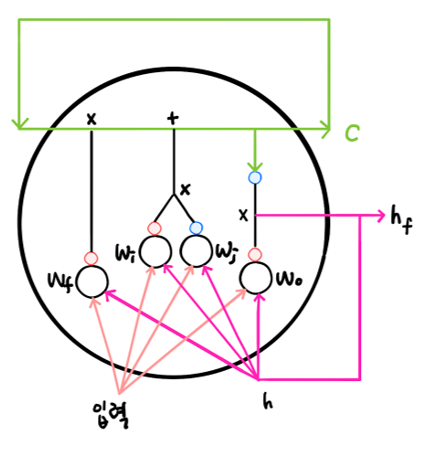

In [ ]:
# 위 그림을 보면 이전과 마찬가지로 입려고가 은닉 상태를 각기 다른 가중치에 곱한 다음 하나는 sigmoid를, 다른 하나는 tanh를 통과시킨다
# 그 뒤 두 결과를 곱한 후 이전 cell 상태와 더하는데, 이게 최종 상태의 cell이다 - 상태 기억

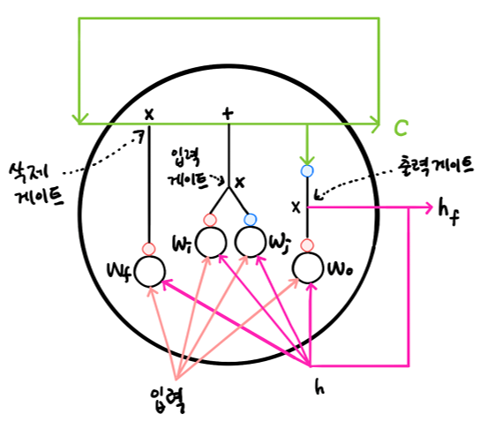

In [ ]:
# 위 그림에서 세군데의 곱셈을 각각 삭제 gate, 입력 gate, 출력 gate라고 부른다
# 삭제 gate: cell의 상태에 있는 정보 제거
# 입력 gate: 새로운 정보를 cell 상태에 추가
# 출력 gate: 이 cell 상태가 다음 은닉상태로 출력
# 위의 처리는 keras의 LSTM class가 알아서 돌린다

In [ ]:
# keras - imdb test set 준비하기
import tensorflow as tf

tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
print(train_input.shape, val_input.shape, test_input.shape)

(20000,) (5000,) (25000,)


In [ ]:
# token 준비
# - 각 sample길이를 100에 맞추고 부족할 때 padding 추가
# - pad_sequences에 truncating='pre' 생략됨 - 기본 값으로 맨 뒤 기준으로 정렬하고 앞쪽 빈칸은 0
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
# LSTM cell을 사용한 순환층 생성
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.Embedding(500, 16, input_shape=(100,))) # num_words=500, embedding vector 크기=16, maxlen=100 - 그래서 input_shape=(100,)
model.add(keras.layers.LSTM(8)) # neuron 개수 8개
# neuron개수, vector 크기는 변경해도 좋다. 단, 2진법으로 맞춰서 하자(2, 4, 8, 16, ...)
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile하고 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.5110 - loss: 0.6929 - val_accuracy: 0.5864 - val_loss: 0.6911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 50ms/step - accuracy: 0.5784 - loss: 0.6907 - val_accuracy: 0.6258 - val_loss: 0.6874
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6217 - loss: 0.6858 - val_accuracy: 0.6562 - val_loss: 0.6765
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.6681 - loss: 0.6682 - val_accuracy: 0.7096 - val_loss: 0.6177
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.7180 - loss: 0.6006 - val_accuracy: 0.7248 - val_loss: 0.5760
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - accuracy: 0.7282 - loss: 0.5690 - val_accuracy: 0.7404 - val_loss: 0.5555
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.7481 - loss: 0.5465 - val_accuracy: 0.7450 - val_loss: 0.5383
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7600 - loss: 0

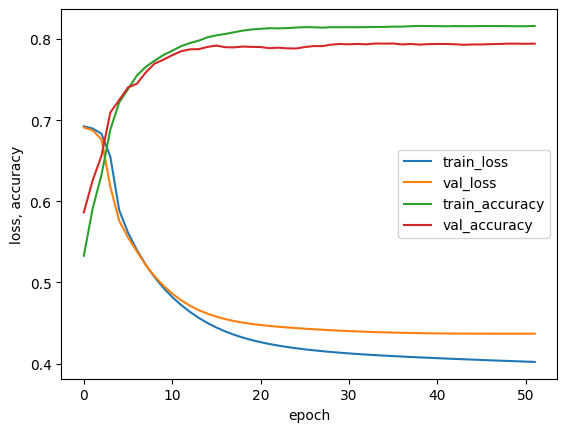

In [ ]:
import matplotlib.pyplot as plt

# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.xlabel('epoch')
# plt.ylabel('loss, accuracy')
# plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
# plt.show()

plot_for_loss_accuracy(history)

In [ ]:
# 결과를 보니 기본 순환층보다 LSTM이 과대적합을 억제하면서 훈련을 잘 수행하는 것 처럼 보인다
# 다만, 경우에 따라서 과대 적합을 더 강하게 제어할 필요가 있다(dropout 써서)

# 완전 연결 신경망과 합성곱 신경망에서는 dropout을 사용해서 dropout을 적용했었다 - 이 방법으로 model이 훈련set에 너무 과대적합되는 것을 방지

# simpleRNN과 LSTM 모두 dropout 매개변수와 reccurent_dropout 매개 변수를 갖고 있으며
# dropout은 cell의 입력에 적용하고, recurrent_dropout은 순환 은닉 상태에 dropout을 적용한다
# recurrent_dropout을 사용하면 GPU를 사용하기 때문에, model을 훈련하지 못한다(훈련 속도가 대폭 감소) - 그래서 이번에는 dropout만 적용하자

model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.LSTM(8, dropout=0.3)) # dropout매개값을 0.3으로 해서 30% 입력의 dropout 설정
model2.add(keras.layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 8)                   │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile하고 훈련 시작
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - accuracy: 0.5145 - loss: 0.6930 - val_accuracy: 0.5716 - val_loss: 0.6922
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.5619 - loss: 0.6920 - val_accuracy: 0.6068 - val_loss: 0.6908
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.6025 - loss: 0.6902 - val_accuracy: 0.6288 - val_loss: 0.6879
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6257 - loss: 0.6865 - val_accuracy: 0.6490 - val_loss: 0.6809
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.6458 - loss: 0.6773 - val_accuracy: 0.6560 - val_loss: 0.6494
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.6848 - loss: 0.6394 - val_accuracy: 0.7270 - val_loss: 0.5991
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.7198 - loss: 0.5997 - val_accuracy: 0.7404 - val_loss: 0.5803
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.7326 - loss: 0

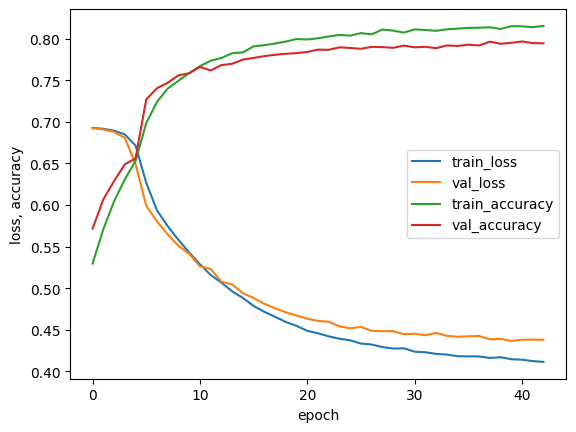

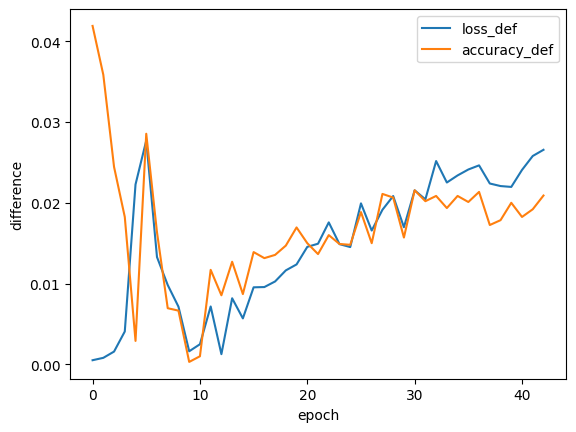

In [ ]:
plot_for_loss_accuracy(history)
plot_of_accuracy_difference(history)

In [ ]:
# 2개 층 연결하기

# 순환층을 연결할 때 한 가지 주의 할 점: 순환층의 은닉상태는 sample의 마지막 timestep에 대한 은닉 상태만 다음 층으로 전달된다

# 하지만 순환층을 쌓게 되면 모든 순환층에 순차 data가 필요하고 앞쪽 순환층이 모든 timestep에 대한 은닉상태를 출력해야 한다
# 오직 마지막 순환층만 마지막 timestep의 은닉 상태를 출력해야 한다

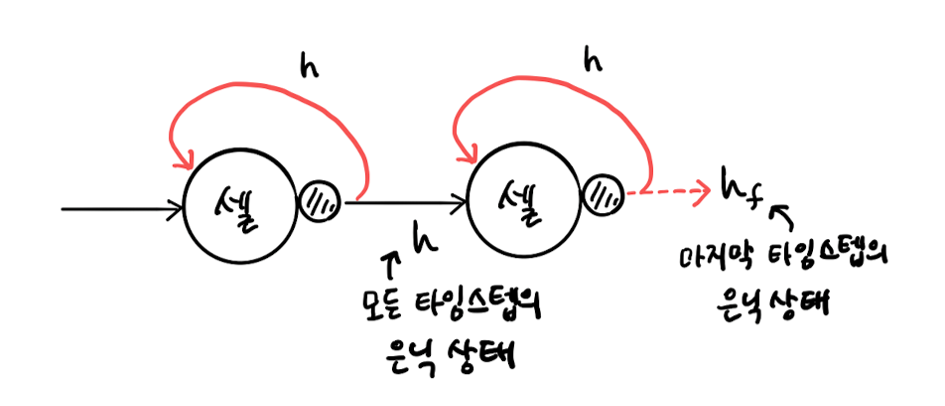

In [ ]:
# keras 순환층에서 모든 timestep의 은닉 상태를 출력하려면 마지막을 제외한 다른 모든 순환층에서 return_sequences=true로 지정해야한다

model3 = keras.Sequential()

model3.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True)) # 1번 LSTM
model3.add(keras.layers.LSTM(8, dropout=0.3)) # 2번 LSTM
model3.add(keras.layers.Dense(1, activation='sigmoid'))

model3.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 100, 8)              │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 98ms/step - accuracy: 0.5235 - loss: 0.6927 - val_accuracy: 0.5964 - val_loss: 0.6907
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 98ms/step - accuracy: 0.5854 - loss: 0.6888 - val_accuracy: 0.6470 - val_loss: 0.6764
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.6495 - loss: 0.6604 - val_accuracy: 0.7104 - val_loss: 0.5774
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.7134 - loss: 0.5717 - val_accuracy: 0.7346 - val_loss: 0.5318
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 100ms/step - accuracy: 0.7405 - loss: 0.5346 - val_accuracy: 0.7580 - val_loss: 0.5051
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 100ms/step - accuracy: 0.7571 - loss: 0.5090 - val_accuracy: 0.7616 - val_loss: 0.4972
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.7712 - loss: 0.4930 - val_accuracy: 0.7654 - val_loss: 0.4921
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 113ms/step - accuracy: 0.7732 - lo

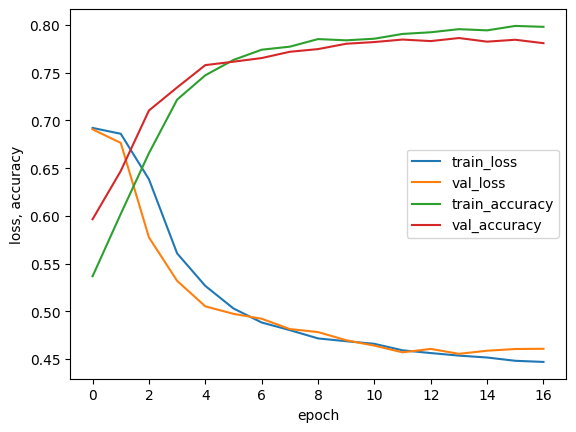

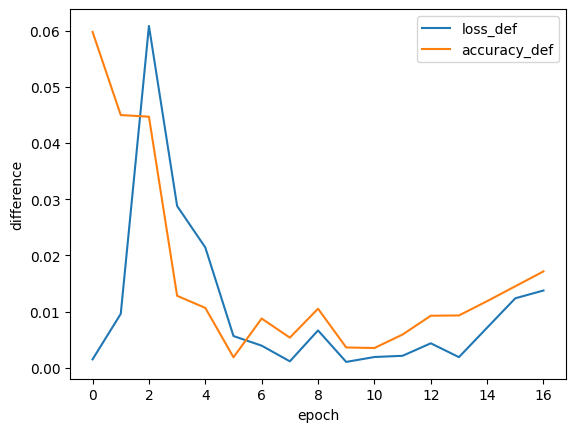

In [ ]:
plot_for_loss_accuracy(history)
plot_of_accuracy_difference(history)

In [ ]:
# GRU(Gated Recurrent Units) - LSTM의 간소화
# cell 상태를 계산하지 않고 은닉상태 하나만 포함하고 있다

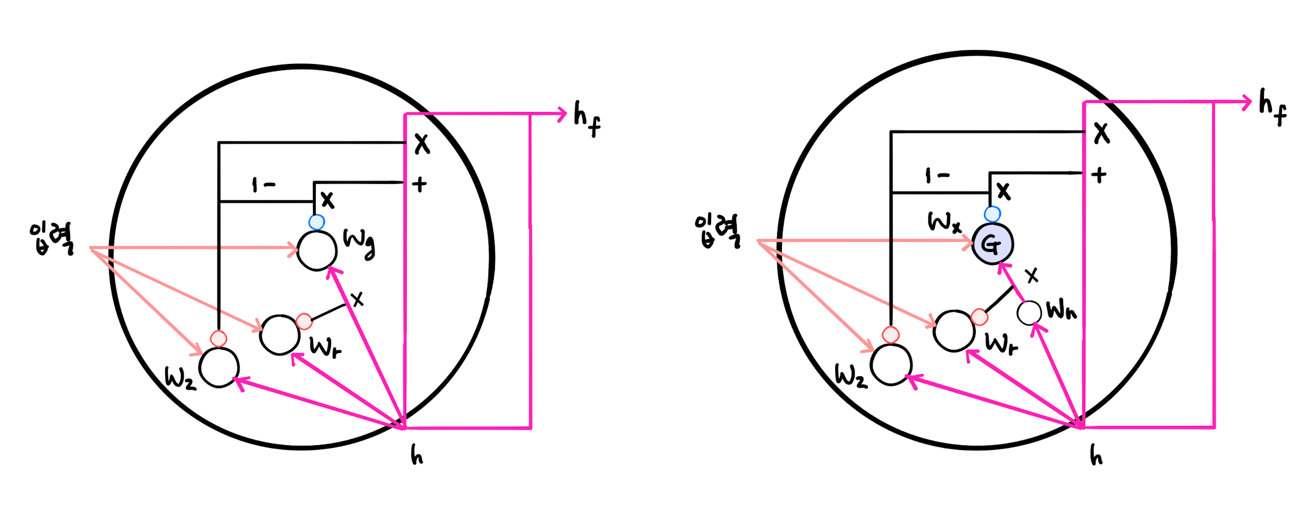

In [ ]:
# GRU cell에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 cell이 3개 들어있다
# 2개는 sigmoid 활성화 함수를 사용하고 하나는 tanh활성화 함수를 사용한다
# 여기에도 은닉 상태와 곱해지는 가중치를 합쳐서 나타냈다

# 맨 왼쪽 w_z를 사용하는 cell의 출력이 은닉 상태에서 바로 곱해져 삭제 gate 역할을 수행한다
# 이와 똑같은 출력은 1에서 뺀 다음, 가장 오른쪽 w_g를 사용하는 cell의 출력에 곱한다 - 입력되는 정보를 제어하는 역할
# 가운데 w_r을 사용하는 cell에서는 출력된 w_g cell이 사용할 은닉 상태의 정보 제어

# GRU cell은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지 않은 좋은 성능을 낸다

In [ ]:
# GRU 신경망 훈련하기
model4 = keras.Sequential()

model4.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

model4.summary()
# pharameter를 계산해보면 GRU cell에는 3개의 작은 cell이 있다.
# 작은 cell에는 입력과 은닉 상태에 곱하는 가중치와 절편이 있다.
# 입력에 곱하는 가중치: 16 * 8 = 128개, 은닉 상태에 곱하는 가중치: 8 * 8 = 64
# 절편은 neuron마다 하나씩이므로 8개임, 모두 더하면 128 + 64 + 8 = 200 이런 작은 셀이 3개 이므로 600개

# 624개가 된 이유? - 3개의 절편마다 8개의 neuron까지 존재하기 때문에 3 * 8 = 24 까지 더해졌다
# tensorflow가 이런 계산 방식을 사용하는 이유? - GPU를 잘 활용하기 위해서 (LSTM 개선점)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 8)                   │             624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.5052 - loss: 0.6931 - val_accuracy: 0.5206 - val_loss: 0.6928
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.5532 - loss: 0.6925 - val_accuracy: 0.5616 - val_loss: 0.6921
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 64ms/step - accuracy: 0.5831 - loss: 0.6917 - val_accuracy: 0.5714 - val_loss: 0.6911
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - accuracy: 0.5901 - loss: 0.6903 - val_accuracy: 0.5844 - val_loss: 0.6893
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.6033 - loss: 0.6882 - val_accuracy: 0.5938 - val_loss: 0.6866
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.6136 - loss: 0.6849 - val_accuracy: 0.6036 - val_loss: 0.6822
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.6197 - loss: 0.6796 - val_accuracy: 0.6120 - val_loss: 0.6752
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.6300 - loss: 0

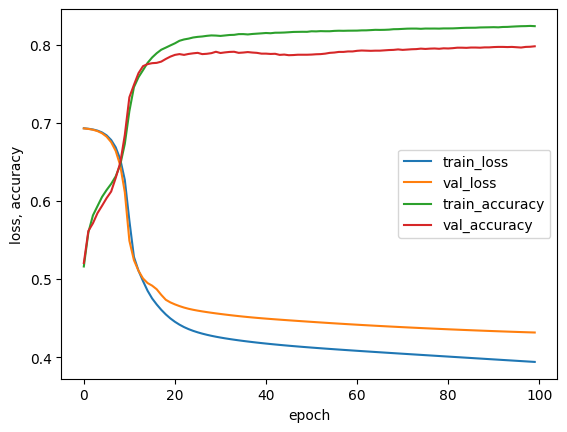

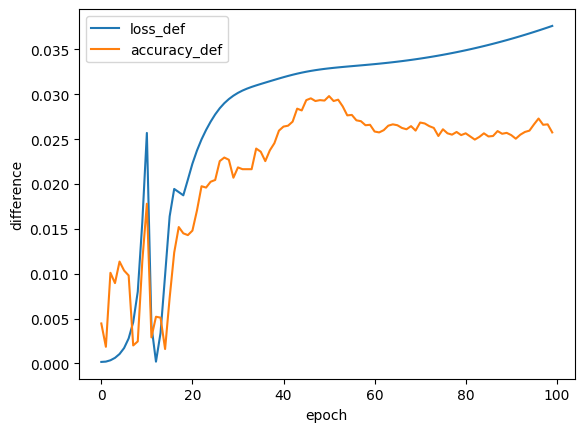

In [ ]:
plot_for_loss_accuracy(history)
plot_of_accuracy_difference(history)

In [ ]:
# 이제 testset도 전처리해서 해보자
test_seq = pad_sequences(test_input, maxlen=100)

In [ ]:
# lstm-model
a = commit_sequence_test('best-lstm-model.keras', test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8005 - loss: 0.4325


None
